# Python读取MNIST方法demo

方法1
使用tensorflow自带下载

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/', one_hot=True) # always fail as timeout error

方法2
使用tensorflow的input_data function读取下载好的MNIST .gz文件

In [12]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("D:\\Document\\05_Python\\Jupyter\\dataset\\MNIST", one_hot=True)
print(mnist.train.images.shape)
print(mnist.train.labels.shape)
print(mnist.test.images.shape)
print(mnist.test.labels.shape)

Extracting D:\Document\05_Python\Jupyter\dataset\MNIST\train-images-idx3-ubyte.gz
Extracting D:\Document\05_Python\Jupyter\dataset\MNIST\train-labels-idx1-ubyte.gz
Extracting D:\Document\05_Python\Jupyter\dataset\MNIST\t10k-images-idx3-ubyte.gz
Extracting D:\Document\05_Python\Jupyter\dataset\MNIST\t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


方法3
解压后的.gz MINST文件为idx-ubyte是一种用来存储向量与多维度矩阵的文件格式
The IDX file format is a simple format for vectors and multidimensional matrices
of various numerical types.
Refer to:
    https://medium.com/@mannasiladittya/converting-mnist-data-in-idx-format-to-python-numpy-array-5cb9126f99f1
    https://www.jianshu.com/p/81f8ca1b722f

In [20]:
# [1]: Importing the required libraries
# Struct is used for handling binary data stored in files.
# It is used to perform conversions between Python values and 
# C structs represented as Python strings.
import struct as st
import numpy as np

# [2]: Open the IDX file in readable binary mode.
train_file = {'images' : r'D:\Document\05_Python\Jupyter\dataset\MNIST\ubyte_file\train-images.idx3-ubyte' ,
              'labels' : r'D:\Document\05_Python\Jupyter\dataset\MNIST\ubyte_file\train-labels.idx1-ubyte'}
train_imagesfile = open(train_file['images'], 'rb')

# [3]: Read the magic number
train_imagesfile.seek(0)
magic = st.unpack('>4B',train_imagesfile.read(4))
# [4]: Read the dimensions of the Image data-set
nImg = st.unpack('>I',train_imagesfile.read(4))[0] #num of images
nR  = st.unpack('>I',train_imagesfile.read(4))[0] #num of rows
nC  = st.unpack('>I',train_imagesfile.read(4))[0] #num of column
# [5]: Declare Image NumPy array (Optional, not required in this case)
images_array = np.zeros((nImg,nR,nC))
# [6]: Reading the Image data
nBytesTotal = nImg * nR * nC * 1 # since each pixel data is 1 byte
images_array = 255 - np.asarray(st.unpack('>'+'B'*nBytesTotal, train_imagesfile.read(nBytesTotal))).reshape((nImg,nR,nC))

print(images_array.shape)

(60000, 28, 28)


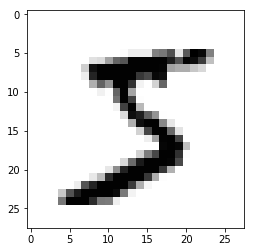

In [23]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(images_array[0], cmap='gray')
plt.show()